<a href="https://colab.research.google.com/github/strange-hawk/tensorflow_examples/blob/main/regressor_with_tf_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !matplotlib inline

In [30]:
np.random.seed(0)

In [35]:
area = np.random.randn(100)*2.5 + 25

In [39]:
price = 25* area + 5 + np.random.randint(20,80, size = len(area))

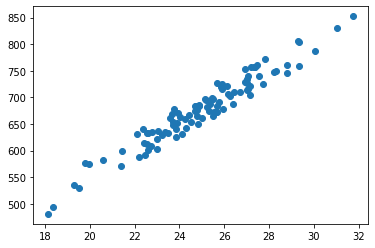

In [40]:
plt.scatter(area,price)

In [43]:
W = np.sum(price * (area - np.mean(area))) / np.sum((area -  np.mean(area))**2)

In [44]:
b = np.mean(price) - W * (np.mean(area))

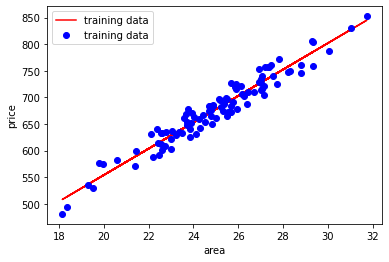

In [54]:
plt.plot(area, W*area+b,'r', area, price, 'bo', label='training data')
plt.xlabel('area')
plt.ylabel('price')
plt.legend()

In [55]:
import tensorflow as tf
from tensorflow import feature_column as fc

In [56]:
numeric_column = fc.numeric_column
categorical_column_with_vocabulary_list = fc.categorical_column_with_vocabulary_list

In [57]:
featcols = [
            tf.feature_column.numeric_column('area'),
            tf.feature_column.categorical_column_with_vocabulary_list('type', vocabulary_list=['bungalow','apartment'])
]

In [58]:
def train_input():
  features = {
      'area' : [1000,2000,4000,1000,2000,4000],
      'type' : ['bungalow', 'bungalow', 'house', 'apartment','apartment','apartment'],
  }
  labels = [500, 1000, 1500, 700, 1300, 1900]
  return features, labels

In [59]:
train_input()[0]['area'][0]

({'area': [1000, 2000, 4000, 1000, 2000, 4000],
  'type': ['bungalow',
   'bungalow',
   'house',
   'apartment',
   'apartment',
   'apartment']},
 [500, 1000, 1500, 700, 1300, 1900])

In [60]:
train_input()[0]['area'][0]

1000

In [62]:
model = tf.estimator.LinearRegressor(featcols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp30qptr1g', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [63]:
model.train(train_input,steps=200)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp30qptr1g/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1548333.4, step = 0
INFO:tensorflow:global_step/sec: 1049.55
INFO:tensorflow:loss = 54075.324, step = 100 (0.096 sec)
INFO:tensorflow:Calling checkpoint listeners before savi

In [70]:
def predict_input_func():
  features = {
      'area' : [1500,1800],
      'type' : ['house', 'apartment']
  }
  return features

In [71]:
out_gen = model.predict(predict_input_func)

In [77]:
print(next(out_gen)['predictions'][0])
print(next(out_gen)['predictions'][0])

692.7829
834.6093
